# __House Prices - Advanced Regression Techniques__

I am not a expert in data science. There might be some issues. I hope you like this. These all written by myself and please leave a comment.. 

<img src='https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png'>

## __Workflow Stages__

1. Problem definition.
2. Acquire training and testing data.
3. Wrangle, Prepare, Cleanse the data.
4. Analyze, identify patterns and explore the data.
5. Model, Predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.

* We may combine multiple workflow stages. We may analyze by visualizing data.
* Perform a stage earlier than indicated. We may analyze data before and after wrangling.
* Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.
* We may drop a stage altogether

## __Problem definition__

__Predict sales prices and practice feature engineering, RFs, and gradient boosting__

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### __Workflow goals__

The datascience solutions workflow solves for seven major goals.

__Classifing__. We may want to classify or categorize our samples. We may also want to undestand the implications or correlations of different classes with ourr solution goals

__Correlation__. One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

__Converting__. For modelling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all feature to be converted to numerical equivalent values. So for instance converting text categorical values to numerical values.

__Completing__. Data preparation may also require us to estimate any missing values within a feature. Model algorithm may work best when there are no missing values.

__Correcting__. We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contributing to the analysis or may significantly skew the result.

__Creating__. Can we create new feature based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

__Charting__. How to slect the right visualization plots and charts depending on nature of the data and the solution goals.

In [220]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tabulate import tabulate
import itertools

# model training
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

## __Acquire the data__

Import train and test data sets using python pandas library and we create a variable called combine with combining train and test data sets together.

In [174]:
# Training data
train_df = pd.read_csv('train.csv')
# Test data
test_df = pd.read_csv('test.csv')
# We combine the training and testing data for our convenience
combine = [train_df, test_df]

## __Analyze data by describing__

With pandas library we can use it to answer following questions.

#### __Which features are available in the dataset?__

In training dataset there are 81 features and testing dataset there are 80 features.

In [175]:
train_df.shape

(1460, 81)

In [176]:
test_df.shape

(1459, 80)

In [177]:
print(train_df.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

This is a long dataset. To avoid some columns hiding set the max column display to none

In [178]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### __Which features are categorical?__

These values classify the samples into sets of similar samples. (nominal, ordinal, ratio, interval based)

* Categorical
    * MSZoning
    * Street
    * Alley
    * LotShape
    * LandContour
    * Utilities
    * LongConfig
    * LandSlope
    * Neighbhorhood
    * Condition1
    * Condition2
    * BldgType
    * HouseStyle
    * RoofStyle
    * RoofMalt
    * Exterior1st
    * Exterior2nd
    * MasVnrType
    * ExterQual
    * ExterCond
    * Foundation
    * BsmtQual
    * BsmtCond
    * BsmtExposure
    * BsmtFinType1
    * BsmtFinType2
    * Heating
    * HeatingQC
    * CentralAir
    * Electrical
    * KichenQual
    * Functional
    * FireplaceQu
    * GarageType
    * GarageFinish
    * GarageQual
    * GarageCond
    * PavedDrive
    * PoolQC
    * Fence
    * MiscFeature
    * SaleType
    * SaleCondition
* Ordinal
    * YearBuilt
    * YearRemodAdd
    * BsmtFullBath
    * BsmtHalfBath
    * FullBath
    * HalfBath
    * BedroomAbvGr
    * KitchenAbvGr
    * Fireplaces
    * GarageYrBlt
    * GarageCars
    



#### __Which features are numerical?__

These values change from sample to sample. (Discrete, Continuous, Timeseries based)

* Continuous
    * Id
    * MSSubClass
    * LotFrontage
    * LotArea
    * MasVnrArea
    * BsmtFinSF1
    * BsmtFinSF2
    * BsmtUnfSF
    * TotalBsmtSF
    * 1stFlrSF
    * 2ndFlrSF
    * GrLivArea 
    * GarageArea
    * WoodDeckSF
    * OpenPorchSF
    * EnclosedPorch
    * 3SsnPorch
    * PoolArea
    * MiscVal
    * MoSold
    * SalePrice

* Discrete
    * OverallQual
    * OverallCond
    * LowQualFinSF
    * ScreenPorch



#### __Which features are mixed type?__

Numerical and alphanumerical data within the same feature

* Alphanumerical
    * LotShape
    * LotConfig
    * BldgType

#### __Which feature contain blank, null, empty values?__

* In train dataset:
    * LotFrontage       259
    * Alley            1369
    * BsmtQual           37
    * BsmtCond           37
    * BsmtExposure       38
    * BsmtFinType1       37
    * BsmtFinType2       38
    * Electrical          1
    * FireplaceQu       690
    * GarageType         81
    * GarageYrBlt        81
    * GarageFinish       81
    * GarageQual         81
    * GarageCond         81
    * PoolQC           1453
    * Fence            1179
    * MiscFeature      1406
* In test dataset
    * MSZoning            4
    * LotFrontage       227
    * Alley            1352
    * Utilities           2
    * Exterior1st         1
    * Exterior2nd         1
    * MasVnrType         16
    * MasVnrArea         15
    * BsmtQual           44
    * BsmtCond           45
    * BsmtExposure       44
    * BsmtFinType1       42
    * BsmtFinSF1          1
    * BsmtFinType2       42
    * BsmtFinSF2          1
    * BsmtUnfSF           1
    * TotalBsmtSF         1
    * BsmtFullBath        2
    * BsmtHalfBath        2
    * KitchenQual         1
    * Functional          2
    * FireplaceQu       730
    * GarageType         76
    * GarageYrBlt        78
    * GarageFinish       78
    * GarageCars          1
    * GarageArea          1
    * GarageQual         78
    * GarageCond         78
    * PoolQC           1456
    * Fence            1169
    * MiscFeature      1408
    * SaleType            1

In [179]:
train_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [180]:
test_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### __What are the data types in various features?__

* In training dataset there are 43 object(string), 35 int, 3 float64 data types.
* In testing dataset there are 43 object(sting), 26 int, 11 float64 data types.

In [181]:
train_df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [182]:
test_df.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

#### __What is the distribution of numerical feature values in the dataset?__

* This dataset has 1460 samples. 
* The max quality is 10 and min quality is 1
* The houses in this dataset belongs to 1870-2010 build years.
* Max bathrooms count is 3 in these houses.
* The oldest garage was build in 1900. 
* Most houses don't have a pool
* First house was sold in 2006


In [183]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### __What is the distribution of categorical features?__

* Most houses in this dataset access the road in Pave type
* Most houses are normal condition
* About half of houses in this dataset belongs to 1Story style
* A few amount of houses have a fence
* Sale condition is normal in most of houses


In [184]:
train_df.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


#### __Assumptions based on data analysis__

We arrived following assumtions based on data analysis so far.

* __Correlation__: We want to know how well does each feature correlate with SalePrice.

* __Completing:__ We want to complete all the empty values in the dataset


## __Analyze by pivolating features?__

We can analyze fureture correlation by pivolating each feature.

* We can see the variation of SalePrice with different features with different categories. So we should use the all these features for our model training.

In [185]:
# first create a list with categorical features
cat_futures = ['MSZoning',	'Street',	'Alley',	'LotShape',	'LandContour',	'Utilities'	,'LotConfig'	,'LandSlope',	'Neighborhood'	,'Condition1'	,'Condition2',	'BldgType',	'HouseStyle'	,'RoofStyle',	'RoofMatl'	,'Exterior1st',	'Exterior2nd',	'MasVnrType'	,'ExterQual',	'ExterCond'	,'Foundation',	'BsmtQual'	,'BsmtCond',	'BsmtExposure',	'BsmtFinType1'	,'BsmtFinType2',	'Heating',	'HeatingQC',	'CentralAir',	'Electrical'	,'KitchenQual',	'Functional'	,'FireplaceQu','GarageType',	'GarageFinish',	'GarageQual'	,'GarageCond',	'PavedDrive'	,'PoolQC',	'Fence',	'MiscFeature',	'SaleType',	'SaleCondition']

In [186]:
for each in cat_futures:
    #If you don't have tabulate try commented code line
    # print(train_df[[each,'SalePrice']].groupby([each], as_index=False).mean().sort_values(by='SalePrice', ascending=False),"\n ------------------------")
    print(tabulate((train_df[[each,'SalePrice']].groupby([each], as_index=False).mean().sort_values(by='SalePrice', ascending=False)),headers='keys', tablefmt='fancy_grid', showindex=False))

╒════════════╤═════════════╕
│ MSZoning   │   SalePrice │
╞════════════╪═════════════╡
│ FV         │      214014 │
├────────────┼─────────────┤
│ RL         │      191005 │
├────────────┼─────────────┤
│ RH         │      131558 │
├────────────┼─────────────┤
│ RM         │      126317 │
├────────────┼─────────────┤
│ C (all)    │       74528 │
╘════════════╧═════════════╛
╒══════════╤═════════════╕
│ Street   │   SalePrice │
╞══════════╪═════════════╡
│ Pave     │      181131 │
├──────────┼─────────────┤
│ Grvl     │      130190 │
╘══════════╧═════════════╛
╒═════════╤═════════════╕
│ Alley   │   SalePrice │
╞═════════╪═════════════╡
│ Pave    │      168001 │
├─────────┼─────────────┤
│ Grvl    │      122219 │
╘═════════╧═════════════╛
╒════════════╤═════════════╕
│ LotShape   │   SalePrice │
╞════════════╪═════════════╡
│ IR2        │      239833 │
├────────────┼─────────────┤
│ IR3        │      216036 │
├────────────┼─────────────┤
│ IR1        │      206102 │
├────────────┼──────

## __Analize by visualizing data__

We can continue our assumptions using visualizing data.

#### __Correlation numerical features__

* __Observations__
    * We can see the SalePrice is incresing with getting higher each feture values
    * Also SalePrice is getting higher with some categorical numeric feature values 

* __Decisions__
    * Use each feature for model training
    * There are some high range values. So we want to add scaler for each values

First We want to create two categorical and numerical variable

In [187]:
cat = train_df.select_dtypes('object')
num = train_df.select_dtypes('number')
# But we dont want id and SellPrice columns. Lets drop them
num = num.drop(['Id', 'SalePrice'], axis=1)

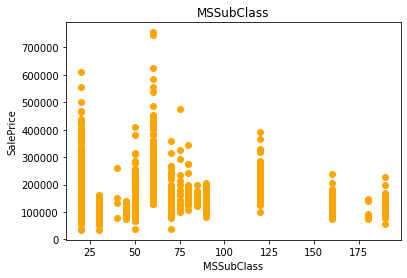

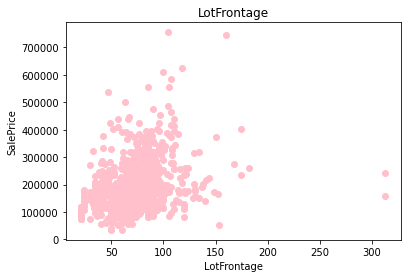

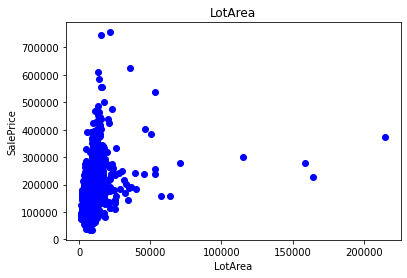

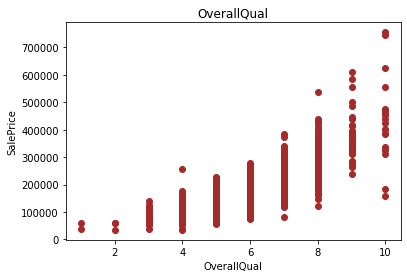

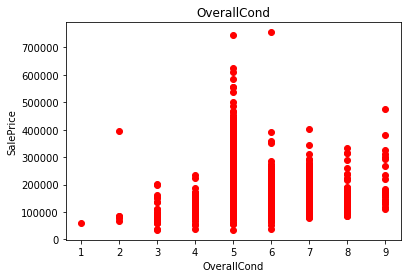

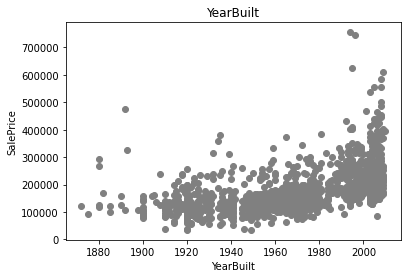

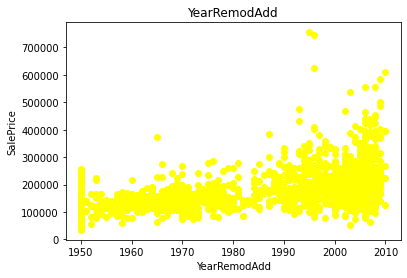

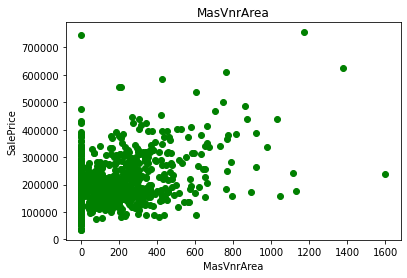

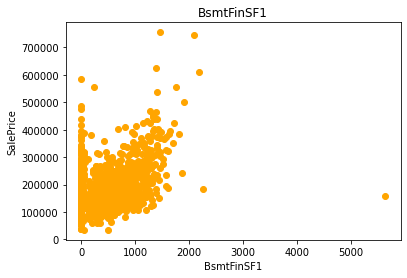

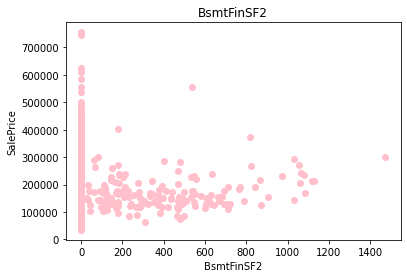

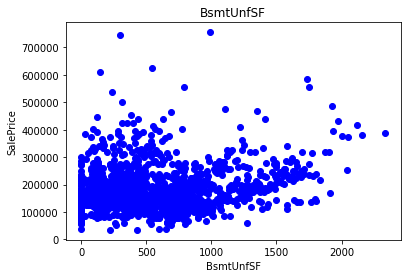

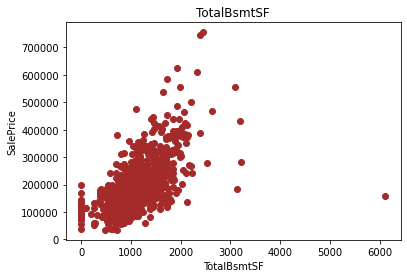

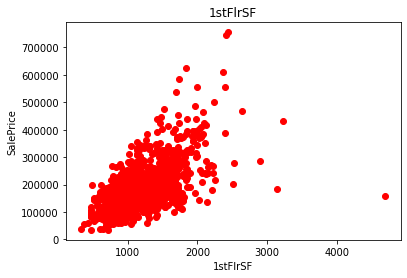

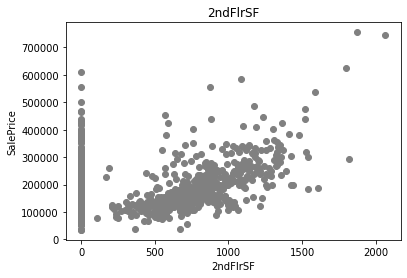

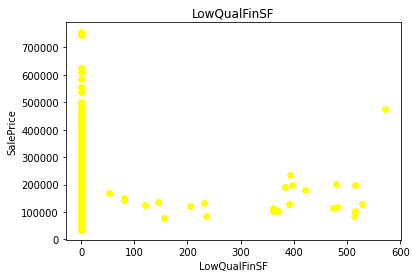

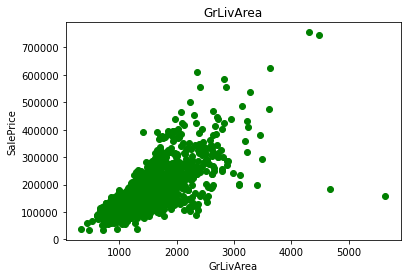

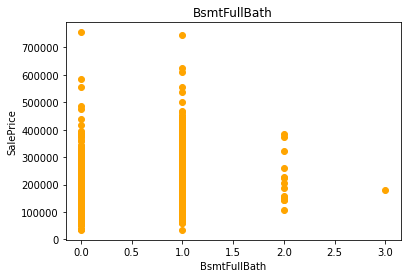

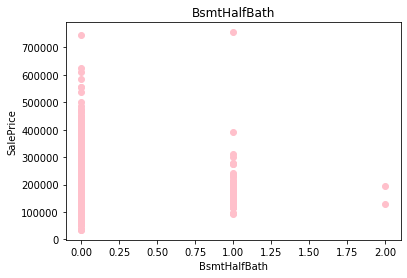

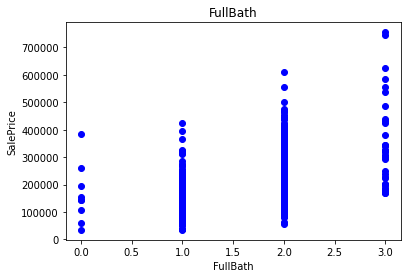

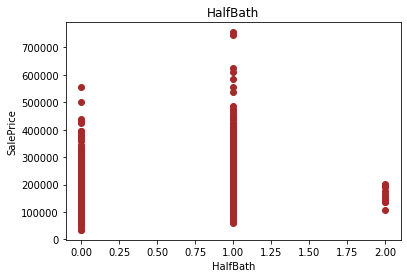

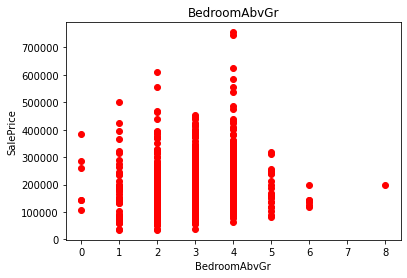

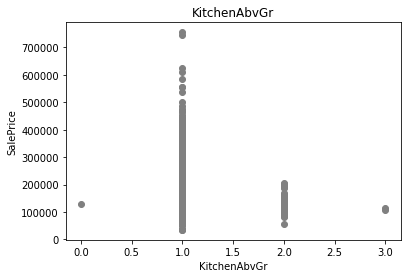

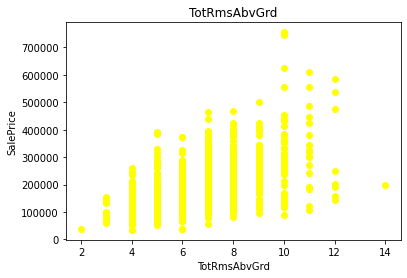

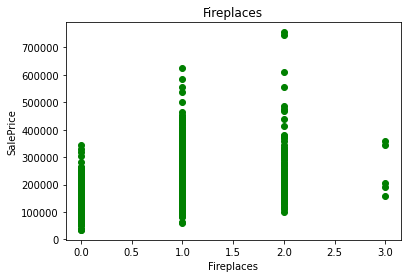

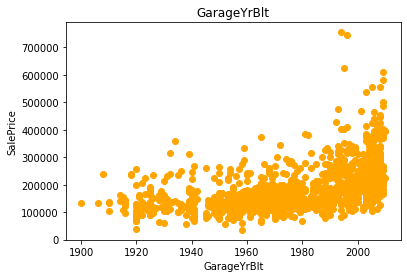

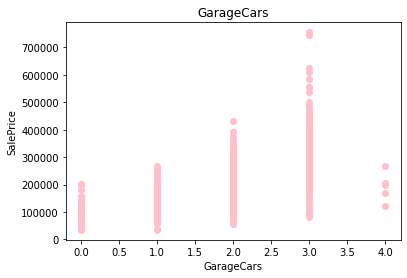

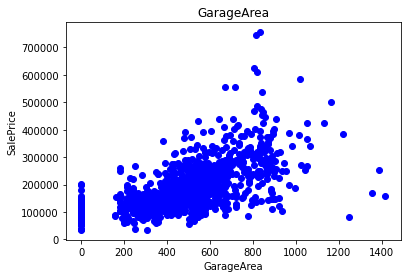

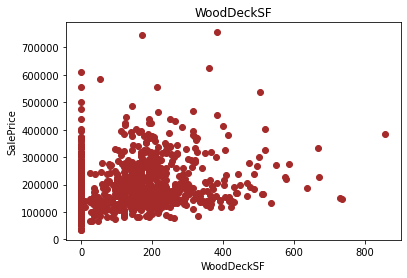

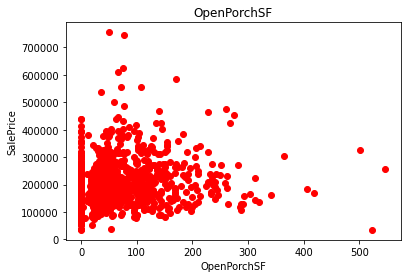

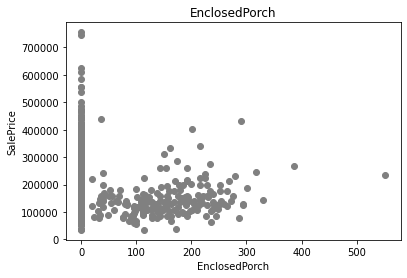

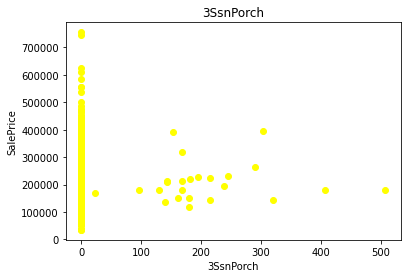

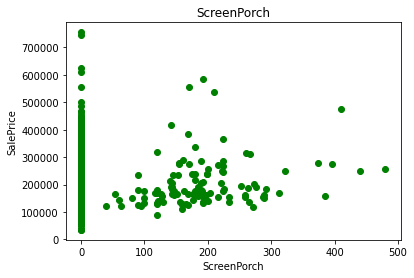

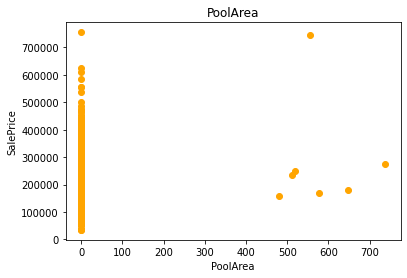

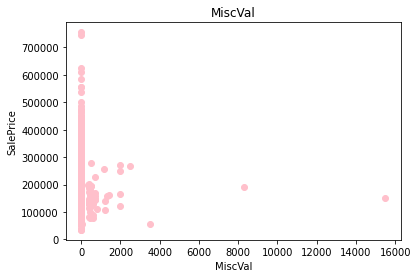

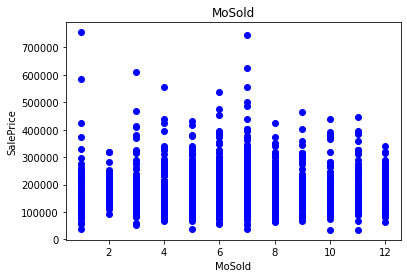

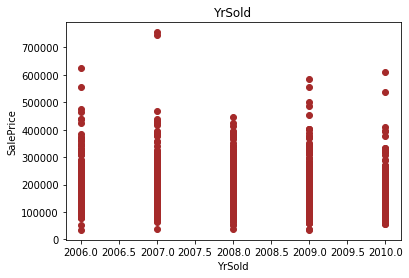

In [188]:
color_cycle= itertools.cycle(["orange","pink","blue","brown","red","grey","yellow","green"])
for i in num:
    plt.scatter(train_df[i],train_df['SalePrice'],color=next(color_cycle))
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

#### __Correlation Categorical feature values__

* __Observations__:
    * We can see how sale price different in each category
    * Some feature categories have few samples
    
* __Desicions__:
    * Use these categorical feature for model training

C:\Users\Anjana Kavidu\AppData\Local\Temp\ipykernel_5876\7573448.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,4))


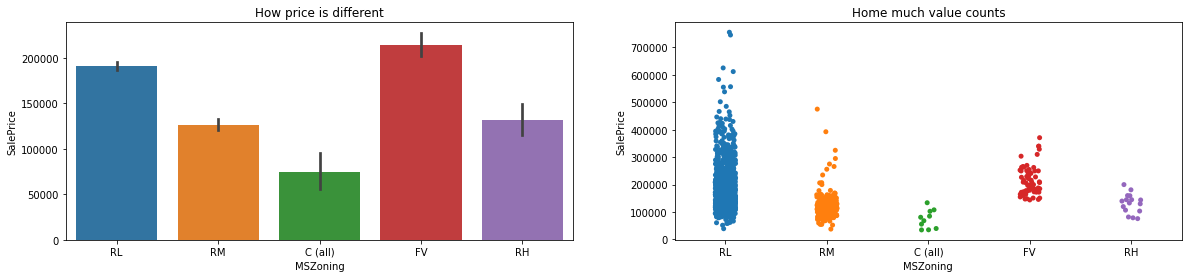

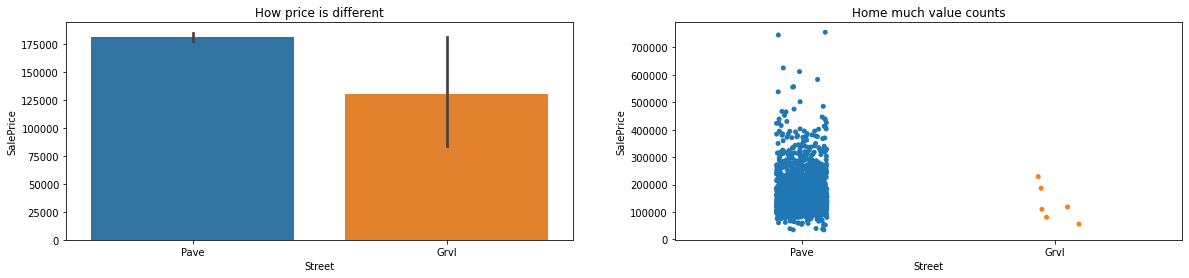

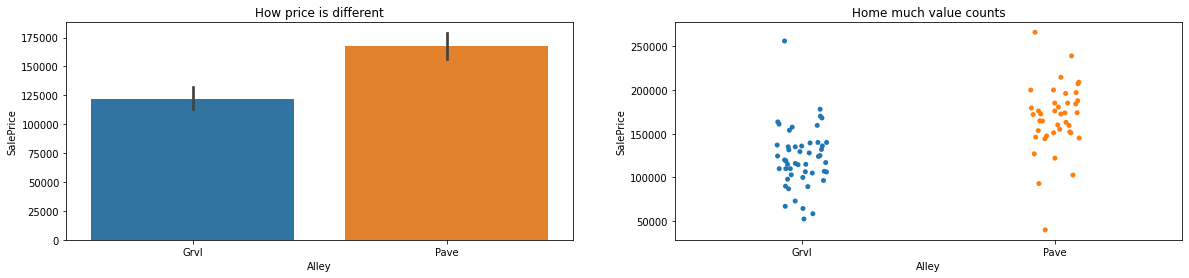

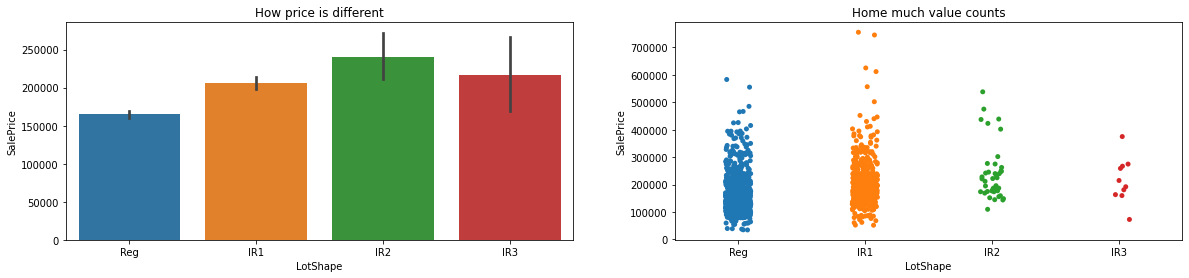

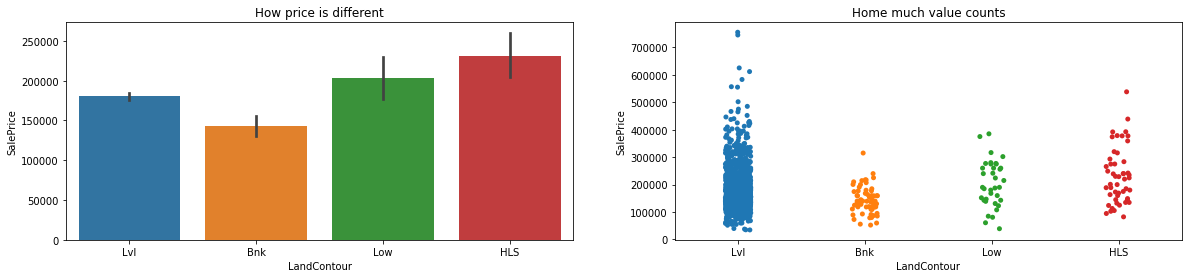

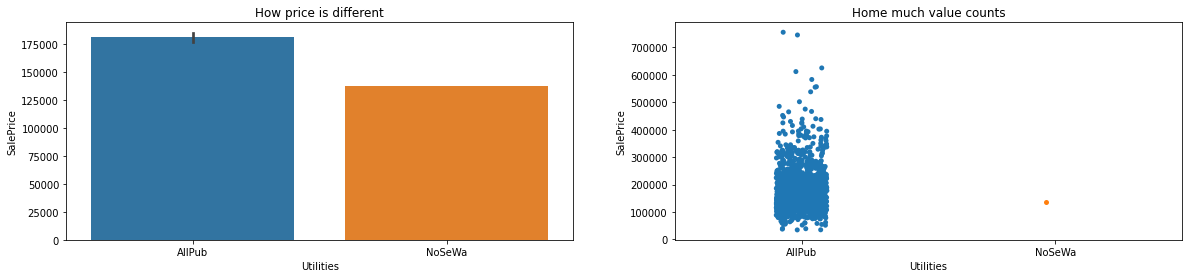

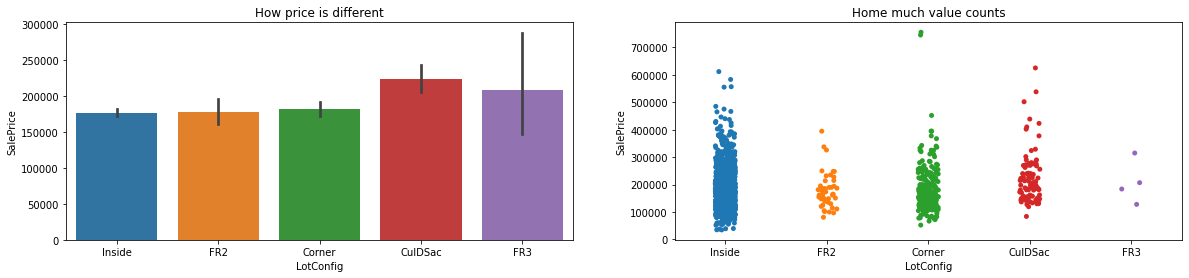

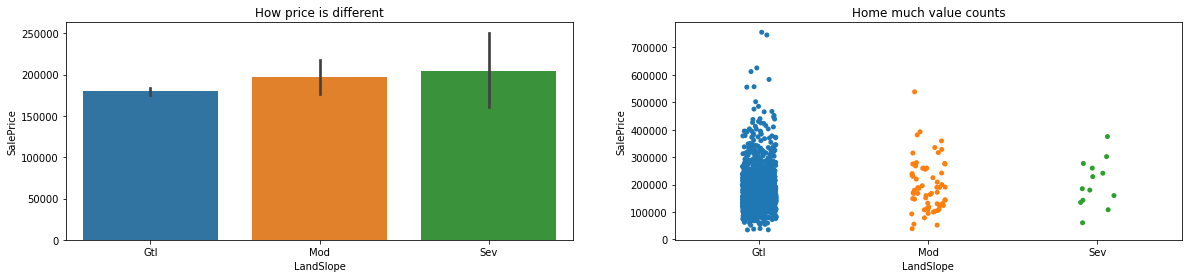

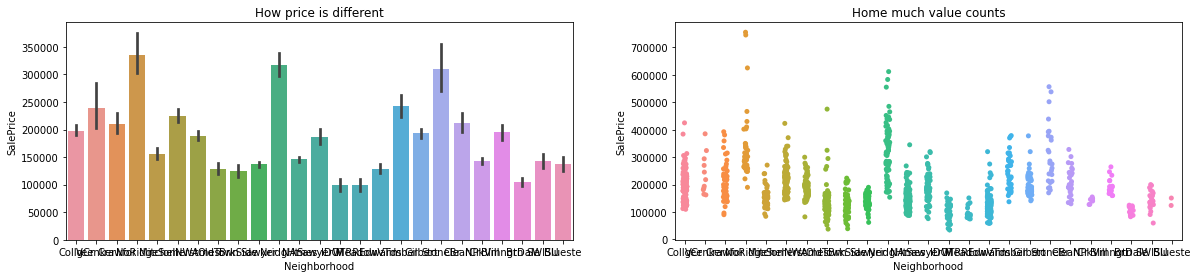

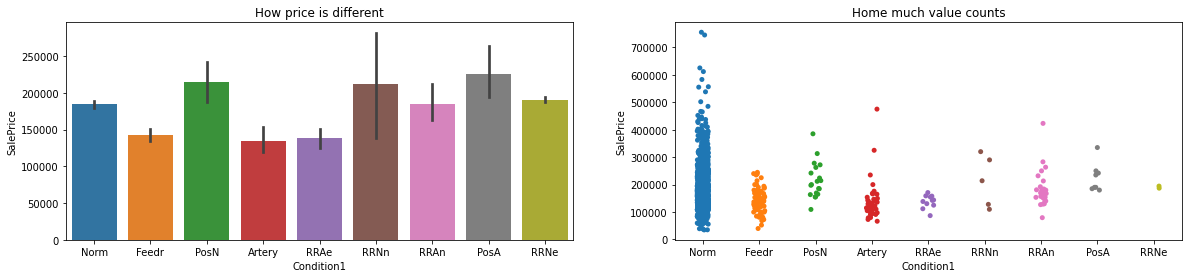

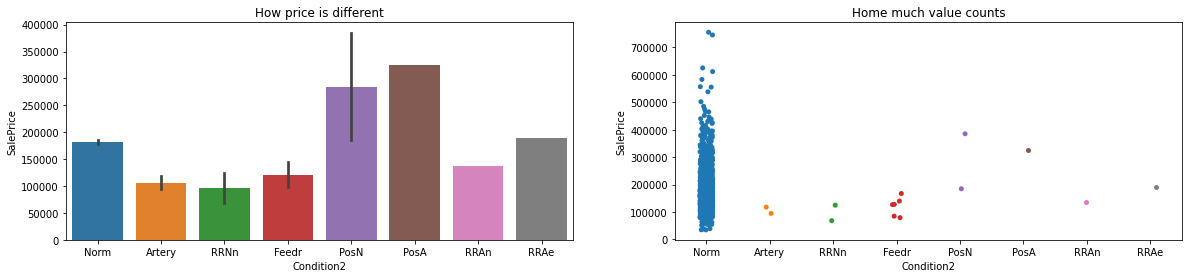

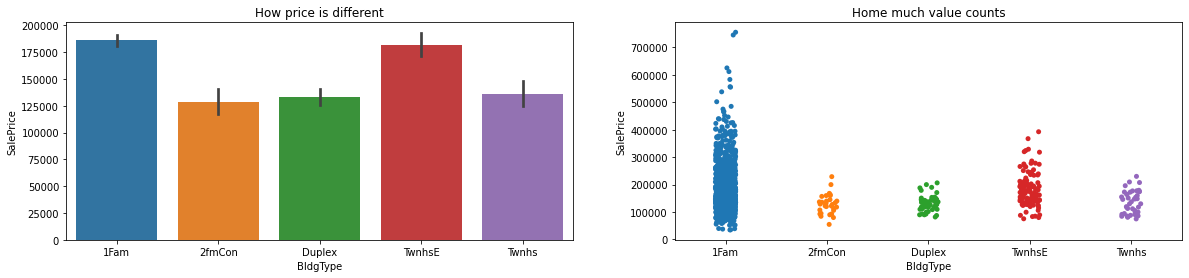

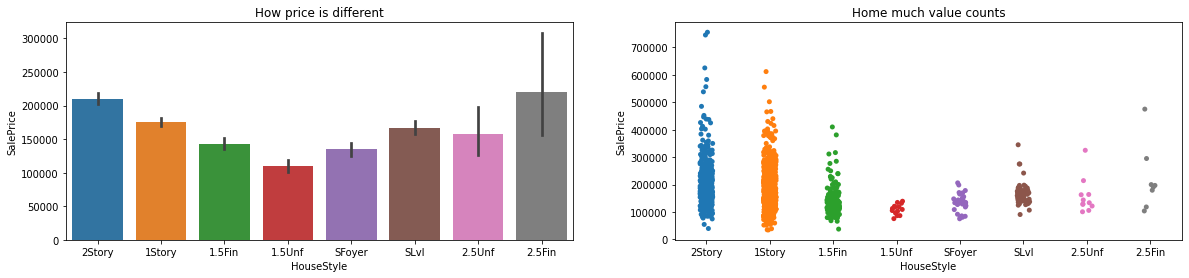

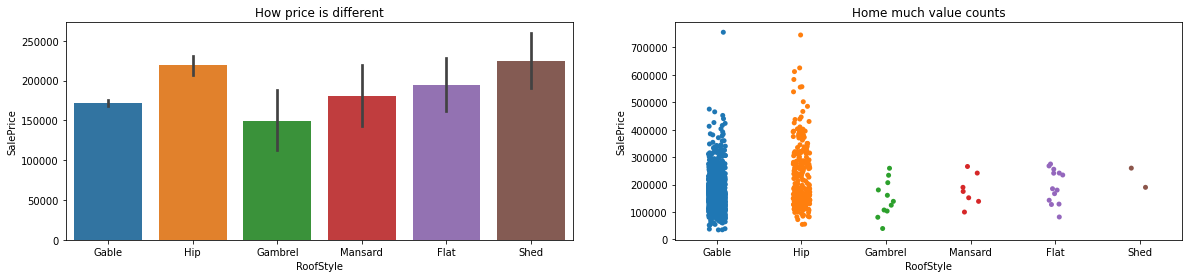

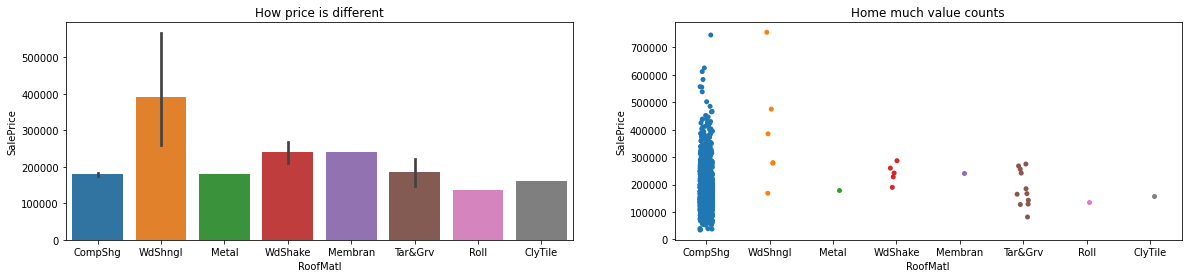

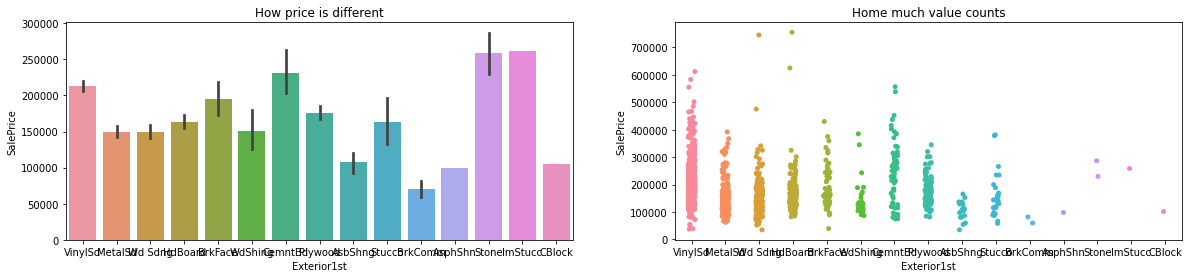

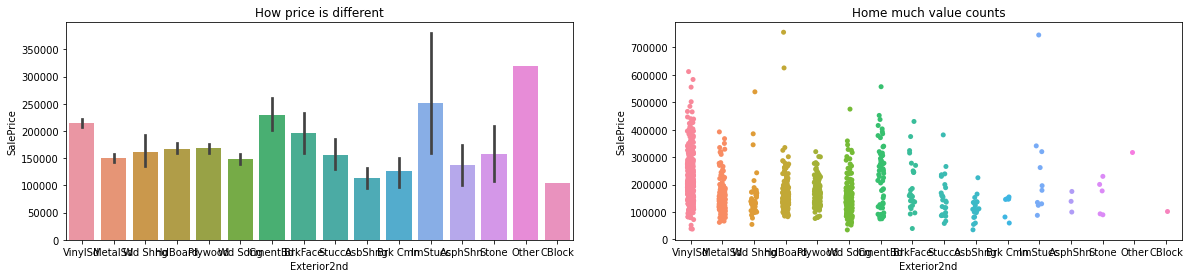

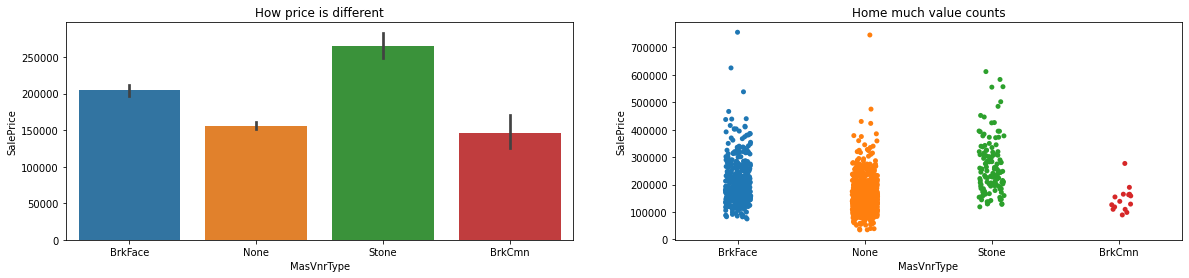

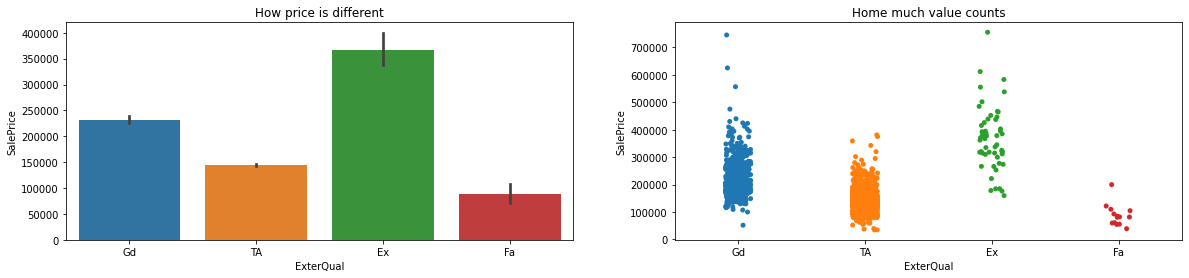

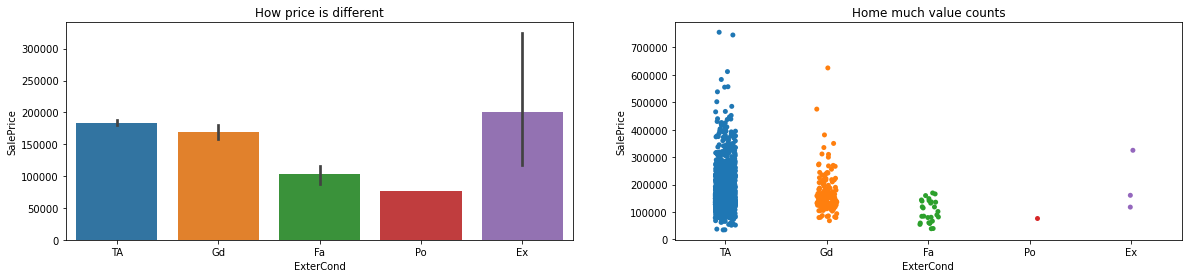

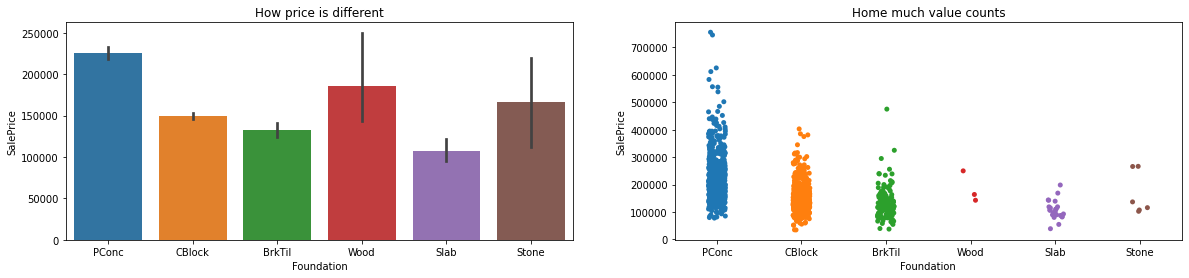

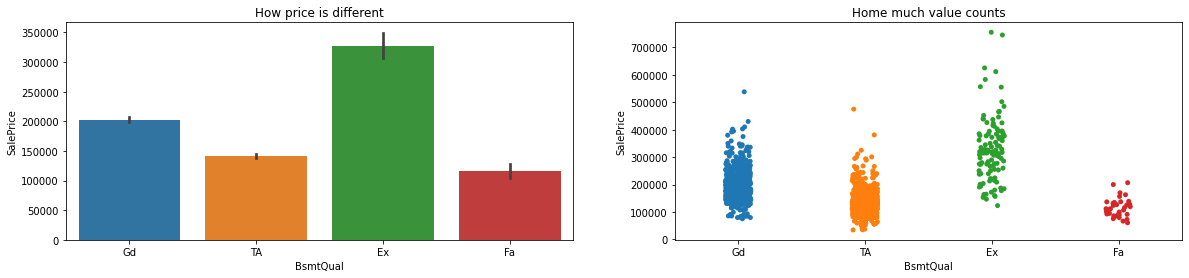

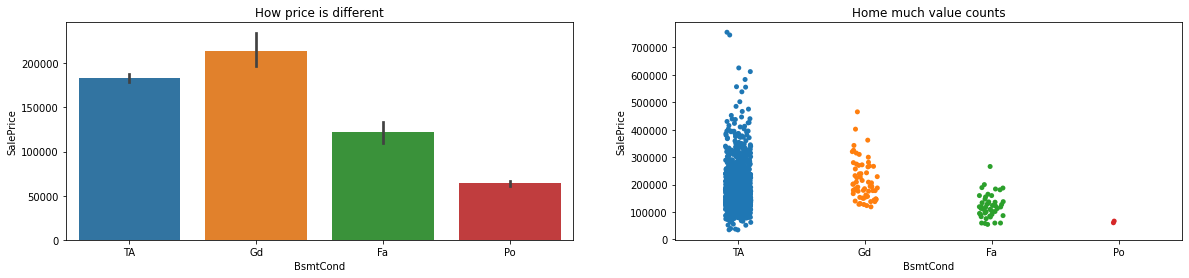

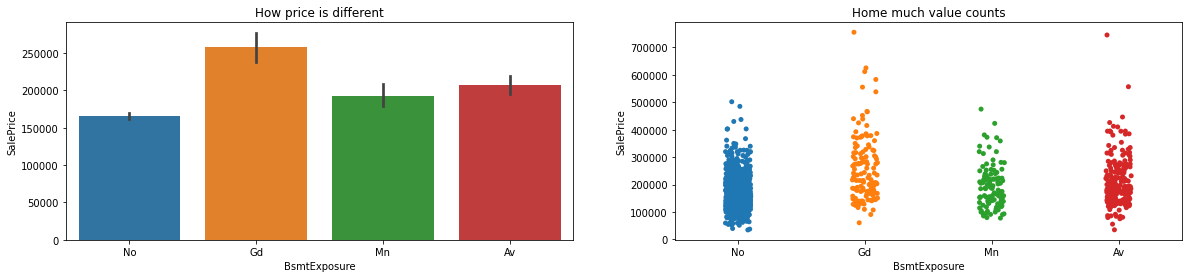

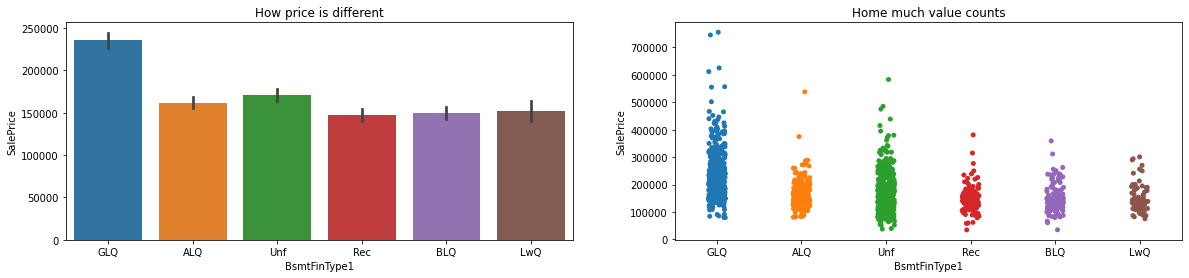

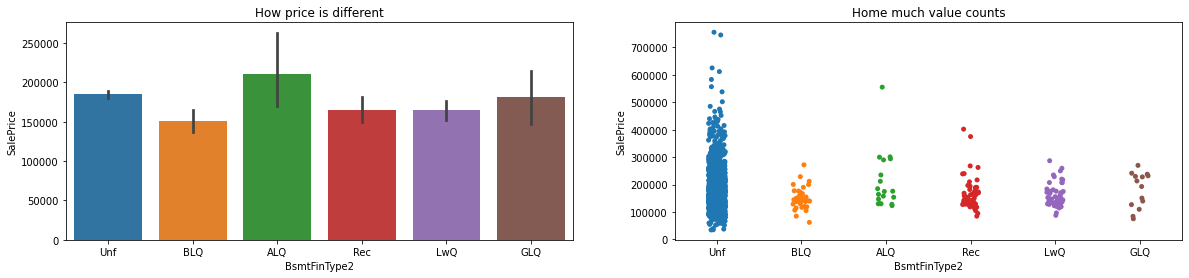

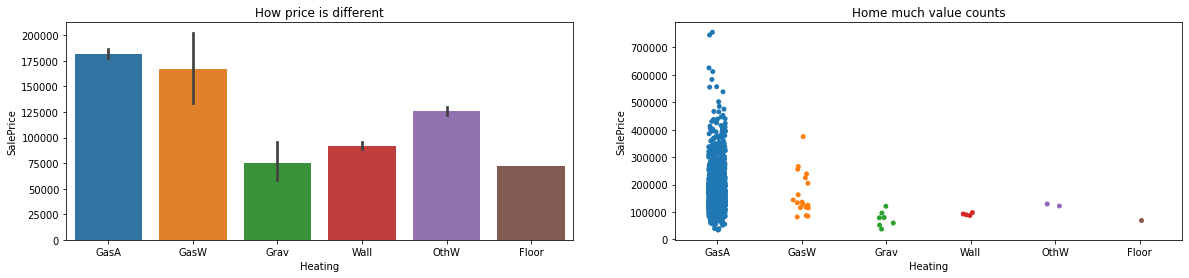

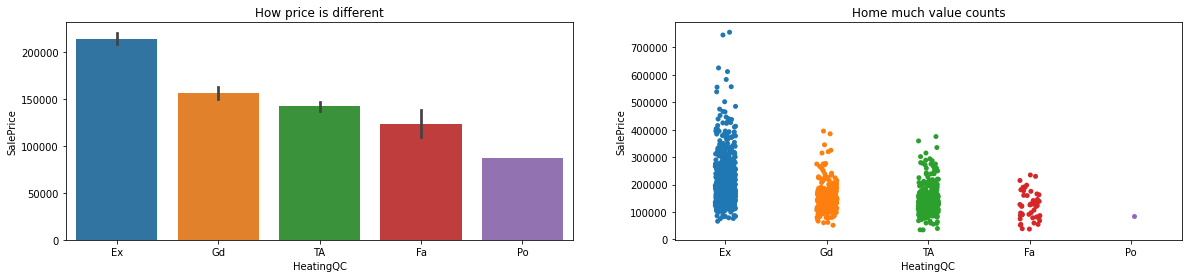

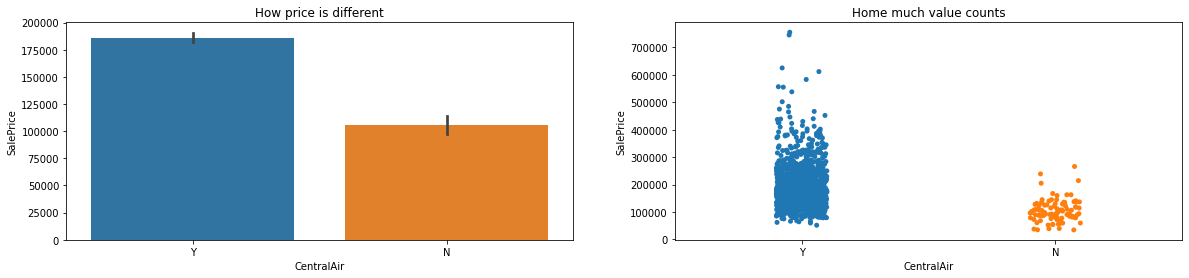

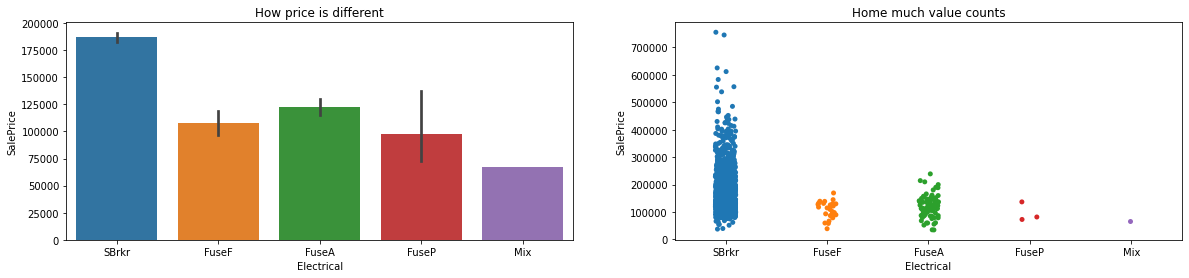

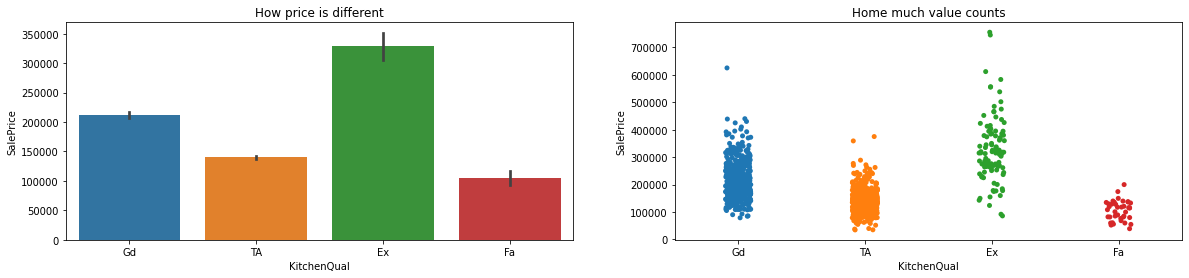

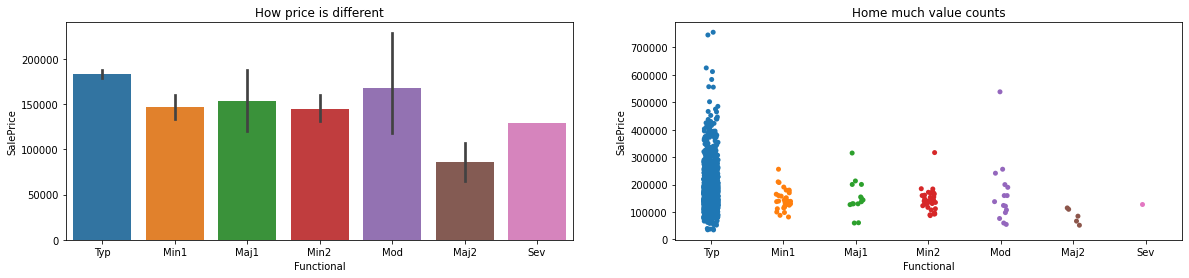

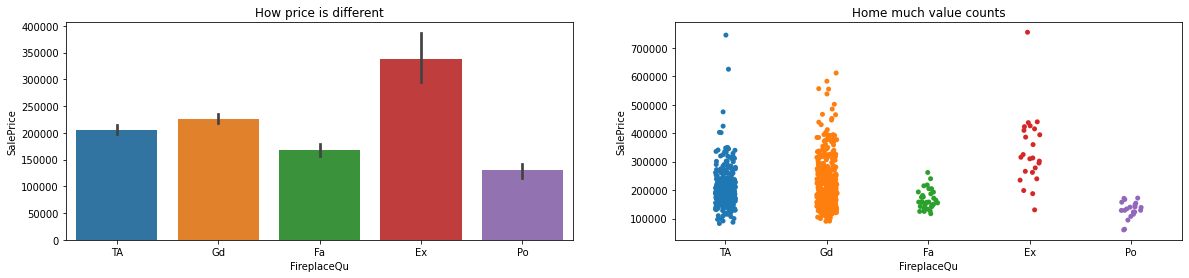

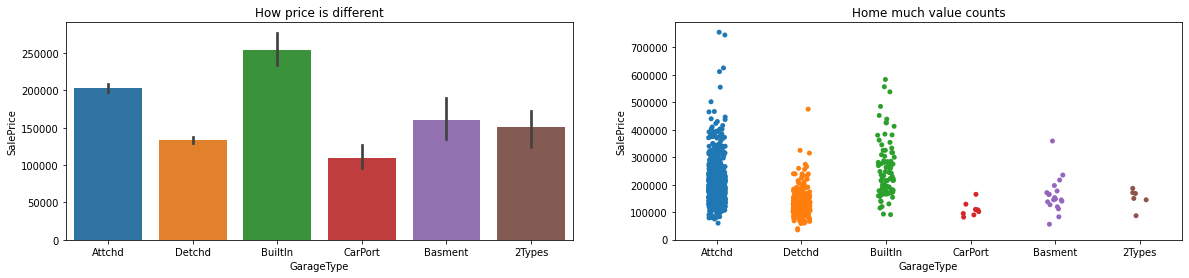

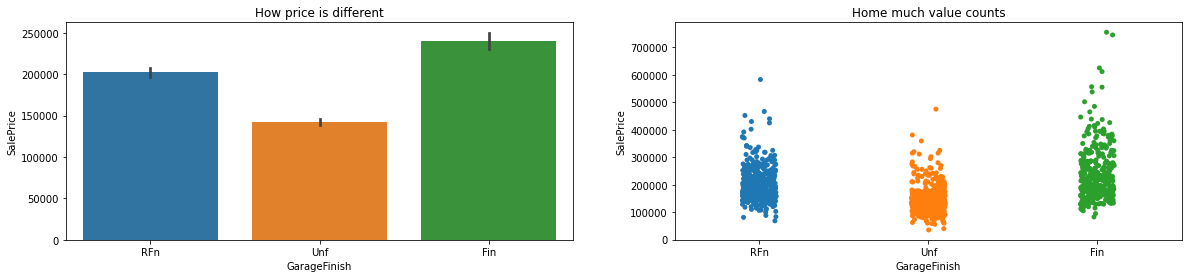

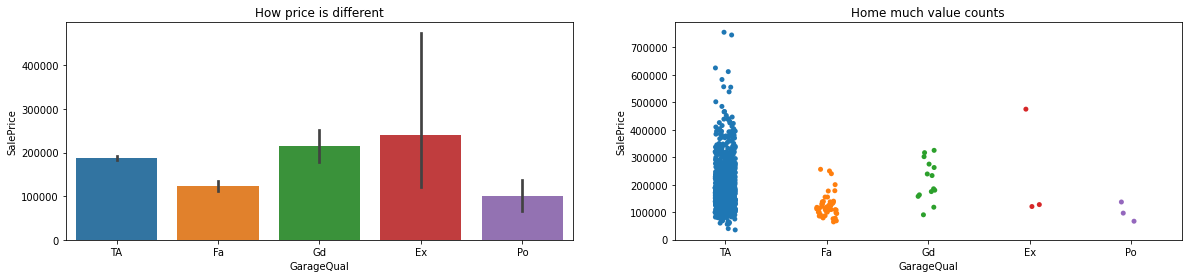

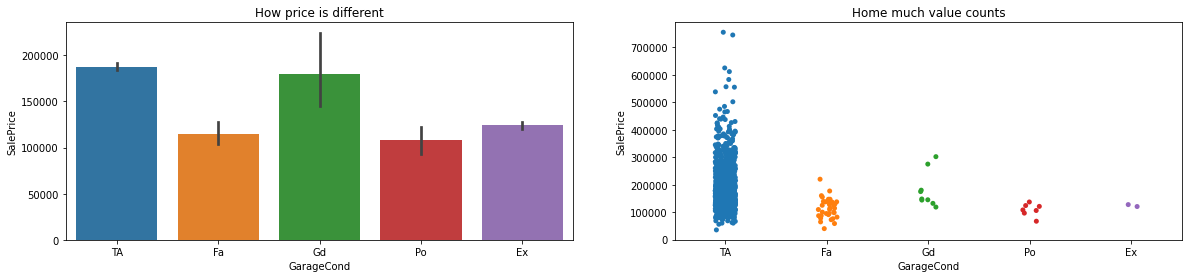

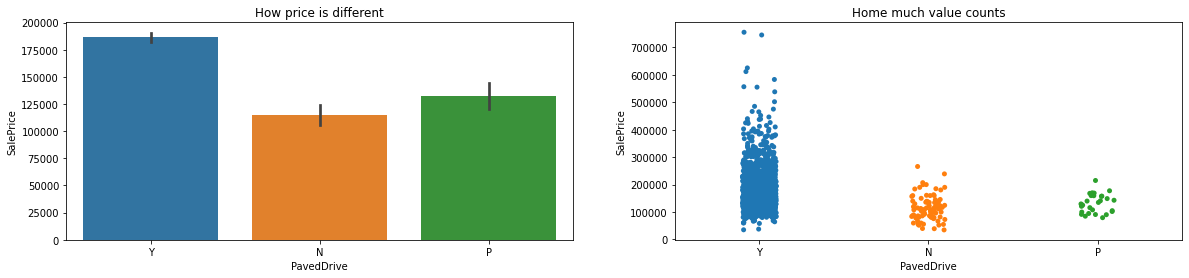

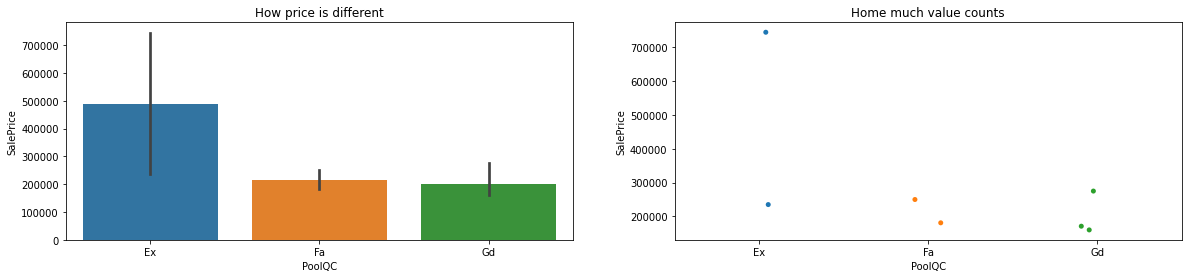

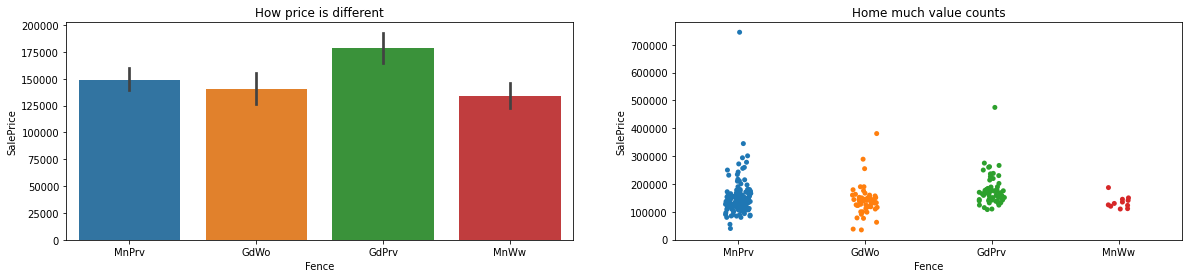

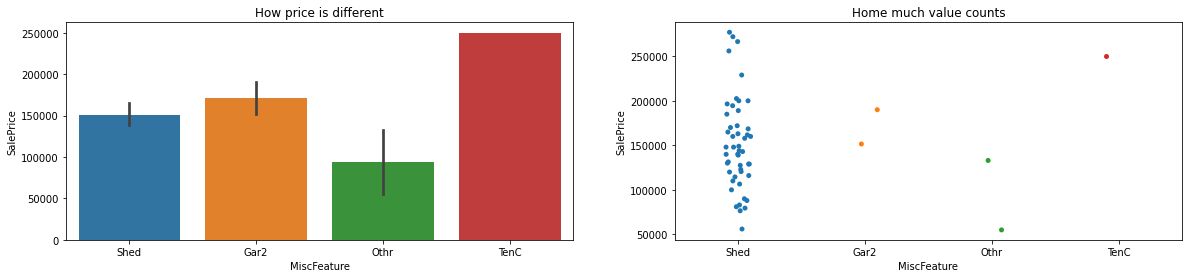

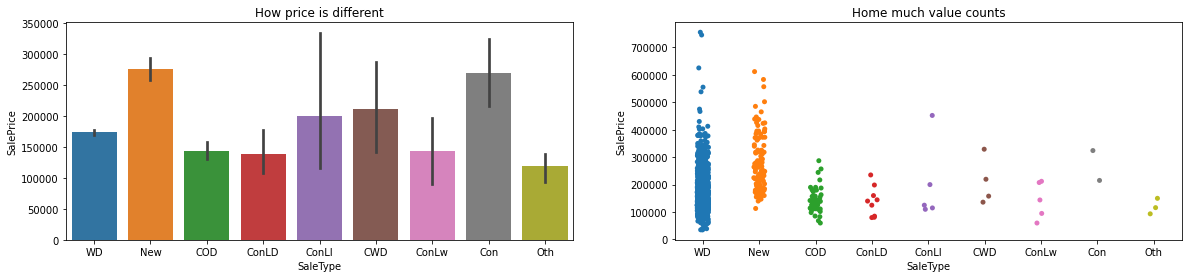

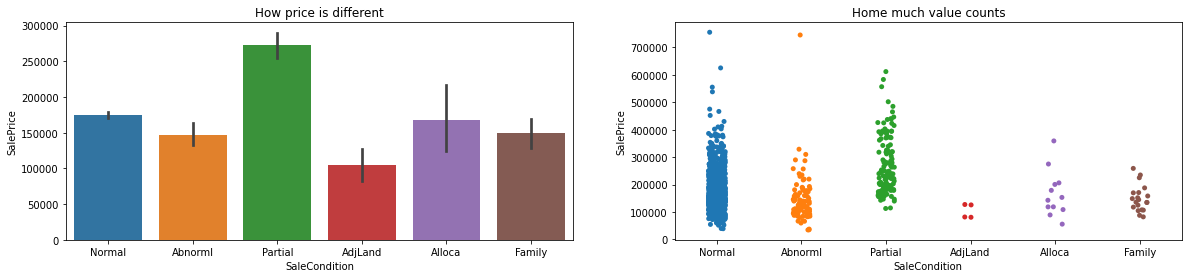

In [189]:
for i in cat:
    plt.figure(figsize=(20,4))
    plt.subplots_adjust(hspace=.25)
    plt.subplot(1,2,1)
    plt.title('How price is different')
    sns.barplot(x=i, y='SalePrice',data=train_df)
    plt.subplot(1,2,2)
    plt.title('Home much value counts')
    sns.stripplot(x=i, y='SalePrice',data=train_df)

## __Wrangle data__

We have collected several assumptions and decisions regarding our datasets and solution requrements. So far we did not change any value or any feature. Lets execute our decisions and assumptions for correcting, creating, and completing goals.

### __Completing empty values__

We should complete empty values in each feature. 

In [190]:
for dataset in combine:
    dataset['LotFrontage'] = dataset['LotFrontage'].fillna(train_df['LotFrontage'].median())
    dataset['LotFrontage'] = dataset['LotFrontage'].fillna(train_df['LotFrontage'].median())
    dataset['Alley'] = dataset['Alley'].fillna('None')
    dataset['BsmtQual'] = dataset['BsmtQual'].fillna('NoBsmt')
    dataset['BsmtCond'] = dataset['BsmtCond'].fillna('NoBsmt')
    dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna('NoBsmt')
    dataset['BsmtFinType1'] = dataset['BsmtFinType1'].fillna('NoBsmt')
    dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna('NoBsmt')
    dataset['Electrical'] = dataset['Electrical'].fillna(train_df.Electrical.dropna().mode()[0])
    dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna('Gd')
    dataset['GarageType'] = dataset['GarageType'].fillna('NoGarage')
    dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(0)
    dataset['GarageFinish'] = dataset['GarageFinish'].fillna('NoGarage')
    dataset['GarageQual'] = dataset['GarageQual'].fillna('NoGarage')
    dataset['GarageCond'] = dataset['GarageCond'].fillna('NoGarage')
    dataset['PoolQC'] = dataset['PoolQC'].fillna('Normal')
    dataset['Fence'] = dataset['Fence'].fillna('NoFence')
    dataset['MiscFeature'] = dataset['MiscFeature'].fillna('None')
    dataset['MSZoning'] = dataset['MSZoning'].fillna('RL')
    dataset['Utilities'] = dataset['Utilities'].fillna('NoSeWa')
    dataset['Exterior1st'] = dataset['Exterior1st'].fillna(train_df.Exterior1st.dropna().mode()[0])
    dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna('Other')
    dataset['MasVnrType'] = dataset['MasVnrType'].fillna('None')
    dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0)
    dataset['BsmtFinSF1'] = dataset['BsmtFinSF1'].fillna(0)
    dataset['BsmtFinSF2'] = dataset['BsmtFinSF2'].fillna(0)
    dataset['BsmtUnfSF'] = dataset['BsmtUnfSF'].fillna(0)
    dataset['TotalBsmtSF'] = dataset['TotalBsmtSF'].fillna(0)
    dataset['BsmtFullBath'] = dataset['BsmtFullBath'].fillna(0)
    dataset['BsmtHalfBath'] = dataset['BsmtHalfBath'].fillna(0)
    dataset['KitchenQual'] = dataset['KitchenQual'].fillna('Gd')
    dataset['Functional'] = dataset['Functional'].fillna('Typ')
    dataset['GarageCars'] = dataset['GarageCars'].fillna(0)
    dataset['GarageArea'] = dataset['GarageArea'].fillna(0)
    dataset['SaleType'] = dataset['SaleType'].fillna('Oth')

combine = [train_df,test_df]

In [191]:
train_df.isnull().sum().value_counts()

0    81
dtype: int64

In [192]:
test_df.isnull().sum().value_counts()

0    80
dtype: int64

Now we can see there isn't any null values.

### __Converting categorical features to numerical__

In [193]:
encoder = LabelEncoder()

In [194]:
for i in cat:
    for dataset in combine:
        dataset[i] = encoder.fit_transform(dataset[i])
combine = [train_df,test_df]

In [195]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,12,2008,8,4,250000


In [196]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,13,2,0.0,3,4,1,4,4,3,5,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,2,1,1961.0,3,1.0,730.0,4,5,2,140,0,0,0,120,0,2,2,1,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,14,1,108.0,3,4,1,4,4,3,0,923.0,6,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,2,1,1958.0,3,1.0,312.0,4,5,2,393,36,0,0,0,0,2,4,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,13,2,0.0,3,4,2,2,4,3,2,791.0,6,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,4,1,1997.0,0,2.0,482.0,4,5,2,212,34,0,0,0,0,2,2,1,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,13,1,20.0,3,4,2,4,4,3,2,602.0,6,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,2,1,1998.0,0,2.0,470.0,4,5,2,360,36,0,0,0,0,2,4,1,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0.0,2,4,2,2,4,3,0,263.0,6,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,2,1,1992.0,2,2.0,506.0,4,5,2,0,82,0,0,144,0,2,4,1,0,1,2010,8,4


### __Drop unwanted features__

Now we want to drop id and SalePrice columns. But before dropping lets create a copy of datasets. 

In [197]:
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

In [198]:
train_df = train_df.drop(['Id', 'SalePrice'], axis=1)
test_df = test_df.drop('Id', axis=1)
combine = [train_df,test_df]

## __Scaling__

There are huge value ranges in the dataset. If we use this data to train our model might be a issue. So we want to scale these values before training.

I'm using here min max scaler.

In [199]:
scaler = MinMaxScaler()

In [200]:
columns = train_df.columns.values

In [201]:
for dataset in combine:
        dataset_scaled = scaler.fit_transform(dataset[columns])
        dataset[columns] = dataset_scaled
combine = [train_df,test_df]

In [202]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.75,0.150685,0.033420,1.0,0.5,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.949275,0.883333,0.2,0.142857,0.857143,0.866667,0.333333,0.12250,0.666667,1.0,0.4,0.5,1.00,0.75,0.333333,0.125089,1.0,0.0,0.064212,0.140098,0.2,0.0,1.0,1.0,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.5,0.166667,0.996517,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,1.0,0.25,0.0,0.090909,0.50,1.0,0.8
1,0.000000,0.75,0.202055,0.038795,1.0,0.5,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.555556,0.875,0.753623,0.433333,0.2,0.142857,0.571429,0.533333,0.666667,0.00000,1.000000,1.0,0.2,0.5,1.00,0.25,0.000000,0.173281,1.0,0.0,0.121575,0.206547,0.2,0.0,1.0,1.0,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.166667,0.983085,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.25,0.0,0.363636,0.25,1.0,0.8
2,0.235294,0.75,0.160959,0.046507,1.0,0.5,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.934783,0.866667,0.2,0.142857,0.857143,0.866667,0.333333,0.10125,0.666667,1.0,0.4,0.5,1.00,0.50,0.333333,0.086109,1.0,0.0,0.185788,0.150573,0.2,0.0,1.0,1.0,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.166667,0.995522,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,1.0,0.25,0.0,0.727273,0.50,1.0,0.8
3,0.294118,0.75,0.133562,0.038561,1.0,0.5,0.0,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.311594,0.333333,0.2,0.142857,0.928571,1.000000,0.666667,0.00000,1.000000,1.0,0.0,1.0,0.25,0.75,0.000000,0.038271,1.0,0.0,0.231164,0.123732,0.2,0.5,1.0,1.0,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.5,0.833333,0.994030,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,1.0,0.25,0.0,0.090909,0.00,1.0,0.0
4,0.235294,0.75,0.215753,0.060576,1.0,0.5,0.0,1.0,0.0,0.5,0.0,0.625000,0.250,0.285714,0.0,0.714286,0.777778,0.500,0.927536,0.833333,0.2,0.142857,0.857143,0.866667,0.333333,0.21875,0.666667,1.0,0.4,0.5,1.00,0.00,0.333333,0.116052,1.0,0.0,0.209760,0.187398,0.2,0.0,1.0,1.0,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.0,0.166667,0.995025,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,1.0,0.25,0.0,1.000000,0.50,1.0,0.8


## __Model train, predict and slove__

Now our dataset is looking good and we have to train the model. Then we can use the model to slove the problem solution. There are many model algorithms to use. But our problem is classification and reggression problem in supervised learning. So we can use these models.

* RandomForestRegressor
* GradientBoostingRegressor
* AdaBoostRegressor
* BaggingRegressor
* KernelRidge
* Ridge
* RidgeCV
* ElasticNet
* ElasticNetCV
* SVR
* StackingCVRegressor
* lgb
* LGBMRegressor
* XGBRegressor

In [203]:
X_train = train_df
y_train = train_df_copy['SalePrice']
X_test = test_df
X_train.shape, y_train.shape, X_test.shape

((1460, 79), (1460,), (1459, 79))

Now we can train our model

In [206]:
# Random forest reggresor
rndfreg = RandomForestRegressor()
rndfreg.fit(X_train, y_train)
print(round(rndfreg.score(X_train, y_train)*100,2),'%')

98.1 %


In [207]:
# Gradient boosting
gbreg = GradientBoostingRegressor()
gbreg.fit(X_train, y_train)
print(round(gbreg.score(X_train, y_train)*100,2),'%')

96.53 %


In [208]:
# Ada boosting
abreg = AdaBoostRegressor()
abreg.fit(X_train, y_train)
print(round(abreg.score(X_train, y_train)*100,2),'%')

87.87 %


In [209]:
# Bagging reg
bgreg = BaggingRegressor()
bgreg.fit(X_train, y_train)
print(round(bgreg.score(X_train, y_train)*100,2),'%')

96.96 %


In [210]:
# Kernal ridge
krid = KernelRidge()
krid.fit(X_train, y_train)
print(round(krid.score(X_train, y_train)*100,2),'%')

84.92 %


In [211]:
# Ridge
rid = Ridge()
rid.fit(X_train, y_train)
print(round(rid.score(X_train, y_train)*100,2),'%')

85.07 %


In [212]:
# Ridge cv
rigcv = RidgeCV()
rigcv.fit(X_train, y_train)
print(round(rigcv.score(X_train, y_train)*100,2),'%')

83.75 %


In [213]:
# Elastic net
elnet = ElasticNet()
elnet.fit(X_train, y_train)
print(round(elnet.score(X_train, y_train)*100,2),'%')

52.76 %


In [214]:
# Elastic net cv
elnetcv = ElasticNetCV()
elnetcv.fit(X_train, y_train)
print(round(elnetcv.score(X_train, y_train)*100,2),'%')

4.53 %


In [215]:
# SVR
svr = SVR()
svr.fit(X_train, y_train)
print(round(svr.score(X_train, y_train)*100,2),'%')

-4.97 %


In [ ]:
# Stacking cv reg
stcvreg = StackingCVRegressor()
stcvreg.fit(X_train, y_train)
print(round(stcvreg.score(X_train, y_train)*100,2),'%')

In [217]:
# lgb
lg = lgb()
lg.fit(X_train, y_train)
print(round(lg.score(X_train, y_train)*100,2),'%')

TypeError: 'module' object is not callable

In [218]:
# LGBMRegressor
lgbmr = LGBMRegressor()
lgbmr.fit(X_train, y_train)
print(round(lgbmr.score(X_train, y_train)*100,2),'%')

98.07 %


In [ ]:
# XGBRegressor
xgbreg = XGBRegressor()
xgbreg.fit(X_train, y_train)
print(round(xgbreg.score(X_train, y_train)*100,2),'%')

## __Model tuning__

Lets try these different models with different parameters and find the best algorithm for our solution

In [221]:
# define a dictionary for models and their parameters
model_param = {
    'DicisionsTree': {
        'model': DecisionTreeRegressor(),
        'params' : {
            'random_state': [10,50,100,150,300]
        }  
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': [1,5,10,50,100],
            'random_state': 0
        }
    },
    'GradientBoosting' : {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50,100,150], 
            'max_depth': [1,3,5,7], 
            'min_samples_split': [2,3,5],
            'learning_rate': 0.05, 
            'loss': 'ls'
        }
    },
    'knn' : {
        'model' : SVR(),
        'params' : {
            'kernel ' : ['linear, rbf']
        }
    },
    'XGB' : {
        'model' : xgb.XGBRegressor(),
        'params' : {
            'colsample_bytree': 0.4603, 
            'gamma':0.0468, 
            'learning_rate':0.05, 
            'max_depth':3, 
            'min_child_weight':1.7817, 
            'n_estimators':2200,
            'reg_alpha':0.4640, 
            'reg_lambda':0.8571,
            'subsample':0.5213, 
            'silent':1,
            'random_state' :7,
            'nthread' : -1
        }
    },
    'LGB' : {
        'model' : lgb.LGBMRegressor(),
        'params' : {
            'objective':'regression',
            'num_leaves':5,
            'learning_rate':0.1, 
            'n_estimators':500,
            'max_bin' : 55, 
            'bagging_fraction' : 0.8,
            'bagging_freq' : 5, 
            'feature_fraction' : 0.2319,
            'feature_fraction_seed':9, 
            'bagging_seed':9,
            'min_data_in_leaf' :6, 
            'min_sum_hessian_in_leaf' : 11
        }
    },
    'AdaBoost' : {
        'model' : AdaBoostRegressor(),
        'params' : {
            
        }
    },
    'BaggingRegressor' : {
        'model' : BaggingRegressor(),
        'params' : {
                 
        }
    },
    'KernelRidge' : {
        'model' : KernelRidge(),
        'params' : {

        }
    },
    'Ridge' : {
        'model' : Ridge(),
        'params' : {
            
        }
    },
    'RidgeCV' : {
        'model' : RidgeCV(),
        'params' : {
            
        }
    },
    'ElasticNet' : {
        'model' : ElasticNet(),
        'params' : {
            
        }
    },
    'ElasticNetCV' : {
        'model' : ElasticNetCV(),
        'params' : {
            
        }
    },
    'StackingCVRegressor' : {
        'model' : StackingCVRegressor(),
        'params' : {
            
        }
    }

}

SyntaxError: expression expected after dictionary key and ':' (3560784989.py, line 28)

In [ ]:
#find the best model
scores = []
for model_name, mp in model_param.items():
  clf = GridSearchCV(mp['model'],mp['params'],cv=3,return_train_score=False)
  clf.fit(X_train, y_train)
  scores.append({
      'model' : model_name,
      'best_score' : clf.best_score_,
      'best_params' : clf.best_params_
  })
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

## __Model training and predict__

So according to above chart we can see SVC is the best scored model with these parameters. So let's use that to train our model.

In [ ]:
model = lgb.LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.1, n_estimators=500,max_bin = 55, bagging_fraction = 0.8,bagging_freq = 5, feature_fraction = 0.2319,feature_fraction_seed=9, bagging_seed=9,min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### __Submission__

Lets do our submission

In [ ]:
submission = pd.DataFrame({
    'Id':test_df_copy['Id'],
    'SalePrice':y_pred
})
submission.to_csv('submission.csv', index=False)

In [ ]:
submission.head()